# Assignment 3

In [1]:
#import the required libraries
import numpy as np
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the datasets
train_x = np.loadtxt('E:\LENOVO\DL_Assign3_datasets\input.csv', delimiter=',')
train_y = np.loadtxt('E:\LENOVO\DL_Assign3_datasets\labels.csv', delimiter=',')
test_x = np.loadtxt('E:\LENOVO\DL_Assign3_datasets\input_test.csv', delimiter=',')
test_y = np.loadtxt('E:\LENOVO\DL_Assign3_datasets\labels_test.csv', delimiter=',')

In [3]:
#reshaping the data as per requirement
train_x = train_x.reshape(len(train_x),100,100,3)
train_y = train_y.reshape(len(train_y),1)
test_x = test_x.reshape(len(test_x),100,100,3)
test_y = test_y.reshape(len(test_y),1)

train_x = train_x / 255.0
test_x = test_x / 255.0

In [4]:
print("train_x shape: ",train_x.shape)
print("train_y shape: ",train_y.shape)
print("test_x shape: ",test_x.shape)
print("test_y shape: ",test_y.shape)

train_x shape:  (2000, 100, 100, 3)
train_y shape:  (2000, 1)
test_x shape:  (400, 100, 100, 3)
test_y shape:  (400, 1)


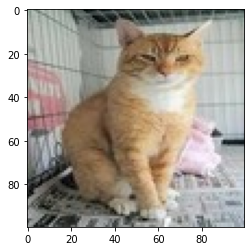

In [5]:
#use random library to get the random integer value
idx = random.randint(0,len(train_x))
plt.imshow(train_x[idx,:])
plt.show()

Model

In [6]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3,),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1,activation='sigmoid')
])

In [7]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
H=model.fit(train_x,train_y,epochs = 10,validation_data=(test_x,test_y),batch_size = 64)

Epoch 1/10
32/32 [==============================] - 11s 326ms/step - loss: 0.7198 - accuracy: 0.5030 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 2/10
32/32 [==============================] - 9s 282ms/step - loss: 0.6889 - accuracy: 0.5675 - val_loss: 0.6956 - val_accuracy: 0.5300
Epoch 3/10
32/32 [==============================] - 9s 284ms/step - loss: 0.6467 - accuracy: 0.6380 - val_loss: 0.6577 - val_accuracy: 0.6275
Epoch 4/10
32/32 [==============================] - 9s 287ms/step - loss: 0.5875 - accuracy: 0.7065 - val_loss: 0.6381 - val_accuracy: 0.6350
Epoch 5/10
32/32 [==============================] - 9s 284ms/step - loss: 0.5233 - accuracy: 0.7530 - val_loss: 0.7147 - val_accuracy: 0.6300
Epoch 6/10
32/32 [==============================] - 9s 288ms/step - loss: 0.4621 - accuracy: 0.7870 - val_loss: 0.6919 - val_accuracy: 0.6375
Epoch 7/10
32/32 [==============================] - 9s 285ms/step - loss: 0.4006 - accuracy: 0.8180 - val_loss: 0.7492 - val_accuracy: 0.6325
Epoch

In [9]:
model.evaluate(test_x,test_y)

13/13 [==============================] - 0s 29ms/step - loss: 0.9915 - accuracy: 0.6450


[0.9915104508399963, 0.6449999809265137]

Making predictions for random image

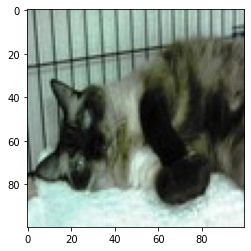

1/1 [==============================] - 0s 203ms/step
Our model says that it's a  cat


In [10]:
idx2 = random.randint(0,len(test_y))
plt.imshow(test_x[idx2,:])
plt.show()
y_pred = model.predict(test_x[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
  pred = 'dog'
else:
  pred = 'cat'

print("Our model says that it's a ",pred)

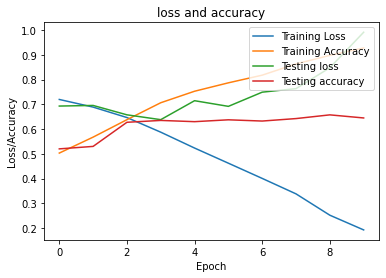

In [11]:
plt.plot(H.history['loss'])
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_loss'])
plt.plot(H.history['val_accuracy'])
plt.title('loss and accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Training Accuracy','Testing loss','Testing accuracy'], loc='upper right')
plt.show()